# Machine Learning : Model Fit

# Load the packages

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import matplotlib

# gradient boosting for regression in scikit-learn
from numpy import mean
from numpy import std
#from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

from sklearn.datasets import make_classification
#from sklearn.experimental import enable_hist_gradient_boosting
#from lightgbm import LGBMClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import tensorflow as tf
from keras.utils import to_categorical

import seaborn as sn

Using TensorFlow backend.


# Read the data and set the training and test set

In [9]:
#Read the data
import pickle
 
X, y = pickle.load( open( "cluster-mldata.plk", "rb" ) )

In [10]:
X.shape

(4442, 2)

In [11]:
y_in.dtype

dtype('int64')

In [12]:
X.dtype

dtype('float64')

In [13]:
y_in.shape

(4442,)

In [14]:
# Fix the seed
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

In [15]:
#Set the traing and test set
X_train, X_test, y_train0, y_test0 = train_test_split(X, y, test_size=0.3, random_state=seed)

In [16]:
y_train = to_categorical(y_train0, num_classes=2)
y_test  = to_categorical(y_test0, num_classes=2)

In [17]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [18]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Model: MLP
# Simple Fit using the whole train sample

In [19]:
# Set the model 
model = Sequential()
model.add(Dense(30,input_dim=2,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='softmax'))

#Compile and Fit the model
#model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [20]:
# Save the model

# Set the folder for saving the model
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

#Save updated model
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1,save_best_only=True)

#Stop learning
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=100)

#model.fit(X, y, validation_split=0.2, epochs = 10, batch_size=200, verbose=0, callbacks=[checkpointer])
#model.fit(X, y, validation_split=0.2, epochs = 120, batch_size=200, verbose=1, 
#          callbacks=[early_stopping_callback,checkpointer])

history = model.fit(X_train, y_train, validation_data=[X_test,y_test], epochs=200, batch_size=300,
                    callbacks=[early_stopping_callback,checkpointer])

print("\n Accuracy: %.4f" %  model.evaluate(X_test,y_test)[1])
    

Train on 3109 samples, validate on 1333 samples
Epoch 1/200
3109/3109 [==============================] - 0s 51us/step - loss: 0.6938 - accuracy: 0.5172 - val_loss: 0.6869 - val_accuracy: 0.6302

Epoch 00001: val_loss improved from inf to 0.68689, saving model to ./model/01-0.6869.hdf5
Epoch 2/200
3109/3109 [==============================] - 0s 6us/step - loss: 0.6845 - accuracy: 0.6250 - val_loss: 0.6779 - val_accuracy: 0.6414

Epoch 00002: val_loss improved from 0.68689 to 0.67792, saving model to ./model/02-0.6779.hdf5
Epoch 3/200
3109/3109 [==============================] - 0s 7us/step - loss: 0.6754 - accuracy: 0.6385 - val_loss: 0.6692 - val_accuracy: 0.6474

Epoch 00003: val_loss improved from 0.67792 to 0.66917, saving model to ./model/03-0.6692.hdf5
Epoch 4/200
3109/3109 [==============================] - 0s 7us/step - loss: 0.6660 - accuracy: 0.6587 - val_loss: 0.6598 - val_accuracy: 0.6617

Epoch 00004: val_loss improved from 0.66917 to 0.65977, saving model to ./model/04-0.6

3109/3109 [==============================] - 0s 5us/step - loss: 0.5212 - accuracy: 0.7420 - val_loss: 0.5241 - val_accuracy: 0.7412

Epoch 00036: val_loss did not improve from 0.52349
Epoch 37/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5210 - accuracy: 0.7411 - val_loss: 0.5229 - val_accuracy: 0.7419

Epoch 00037: val_loss improved from 0.52349 to 0.52290, saving model to ./model/37-0.5229.hdf5
Epoch 38/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5209 - accuracy: 0.7404 - val_loss: 0.5222 - val_accuracy: 0.7449

Epoch 00038: val_loss improved from 0.52290 to 0.52221, saving model to ./model/38-0.5222.hdf5
Epoch 39/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5207 - accuracy: 0.7411 - val_loss: 0.5225 - val_accuracy: 0.7427

Epoch 00039: val_loss did not improve from 0.52221
Epoch 40/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5206 - accuracy: 0.7411 - val_loss: 0.5225 - val_accu

Epoch 74/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5171 - accuracy: 0.7414 - val_loss: 0.5193 - val_accuracy: 0.7449

Epoch 00074: val_loss did not improve from 0.51852
Epoch 75/200
3109/3109 [==============================] - 0s 4us/step - loss: 0.5169 - accuracy: 0.7417 - val_loss: 0.5183 - val_accuracy: 0.7404

Epoch 00075: val_loss improved from 0.51852 to 0.51832, saving model to ./model/75-0.5183.hdf5
Epoch 76/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5171 - accuracy: 0.7427 - val_loss: 0.5184 - val_accuracy: 0.7412

Epoch 00076: val_loss did not improve from 0.51832
Epoch 77/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5168 - accuracy: 0.7433 - val_loss: 0.5188 - val_accuracy: 0.7427

Epoch 00077: val_loss did not improve from 0.51832
Epoch 78/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5172 - accuracy: 0.7401 - val_loss: 0.5193 - val_accuracy: 0.7449

Epoch 00078: val_

3109/3109 [==============================] - 0s 5us/step - loss: 0.5146 - accuracy: 0.7398 - val_loss: 0.5161 - val_accuracy: 0.7427

Epoch 00113: val_loss improved from 0.51614 to 0.51608, saving model to ./model/113-0.5161.hdf5
Epoch 114/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5146 - accuracy: 0.7414 - val_loss: 0.5160 - val_accuracy: 0.7449

Epoch 00114: val_loss improved from 0.51608 to 0.51599, saving model to ./model/114-0.5160.hdf5
Epoch 115/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5142 - accuracy: 0.7414 - val_loss: 0.5158 - val_accuracy: 0.7427

Epoch 00115: val_loss improved from 0.51599 to 0.51575, saving model to ./model/115-0.5158.hdf5
Epoch 116/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5146 - accuracy: 0.7401 - val_loss: 0.5156 - val_accuracy: 0.7449

Epoch 00116: val_loss improved from 0.51575 to 0.51562, saving model to ./model/116-0.5156.hdf5
Epoch 117/200
3109/3109 [=============

3109/3109 [==============================] - 0s 5us/step - loss: 0.5128 - accuracy: 0.7411 - val_loss: 0.5144 - val_accuracy: 0.7442

Epoch 00152: val_loss did not improve from 0.51370
Epoch 153/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5125 - accuracy: 0.7424 - val_loss: 0.5135 - val_accuracy: 0.7464

Epoch 00153: val_loss improved from 0.51370 to 0.51354, saving model to ./model/153-0.5135.hdf5
Epoch 154/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5124 - accuracy: 0.7462 - val_loss: 0.5141 - val_accuracy: 0.7427

Epoch 00154: val_loss did not improve from 0.51354
Epoch 155/200
3109/3109 [==============================] - 0s 6us/step - loss: 0.5118 - accuracy: 0.7446 - val_loss: 0.5137 - val_accuracy: 0.7464

Epoch 00155: val_loss did not improve from 0.51354
Epoch 156/200
3109/3109 [==============================] - 0s 6us/step - loss: 0.5119 - accuracy: 0.7417 - val_loss: 0.5135 - val_accuracy: 0.7449

Epoch 00156: val_loss imp


Epoch 00190: val_loss did not improve from 0.51159
Epoch 191/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5095 - accuracy: 0.7427 - val_loss: 0.5120 - val_accuracy: 0.7464

Epoch 00191: val_loss did not improve from 0.51159
Epoch 192/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5093 - accuracy: 0.7430 - val_loss: 0.5123 - val_accuracy: 0.7487

Epoch 00192: val_loss did not improve from 0.51159
Epoch 193/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5095 - accuracy: 0.7436 - val_loss: 0.5117 - val_accuracy: 0.7479

Epoch 00193: val_loss did not improve from 0.51159
Epoch 194/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5096 - accuracy: 0.7414 - val_loss: 0.5122 - val_accuracy: 0.7494

Epoch 00194: val_loss did not improve from 0.51159
Epoch 195/200
3109/3109 [==============================] - 0s 5us/step - loss: 0.5093 - accuracy: 0.7427 - val_loss: 0.5117 - val_accuracy: 0.7479

Epoc

In [21]:
# Test set error
y_vloss = history.history['val_loss']
# Train set error
y_loss = history.history['loss']

y_acc = history.history['accuracy']

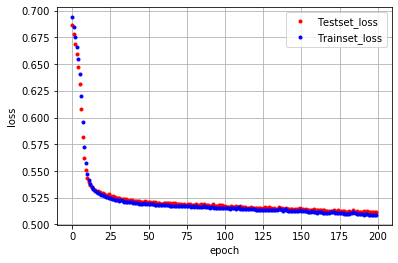

In [22]:
# Make the graph
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=3, label='Trainset_loss')

# Plot 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [23]:
model.predict(X_test[[0]])

array([[0.70296746, 0.29703254]], dtype=float32)

In [24]:
model.predict_classes(X_test[0:20])

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [25]:
y_pred = model.predict_classes(X_test)

In [26]:
print(y_pred)

[0 1 1 ... 1 0 0]


# Confusion matrics

In [30]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test0, y_pred)
conf_mx

array([[283, 252],
       [ 82, 716]])

In [31]:
y_test0

array([0, 0, 0, ..., 1, 0, 0])

Text(24.0, 0.5, 'HasDetections')

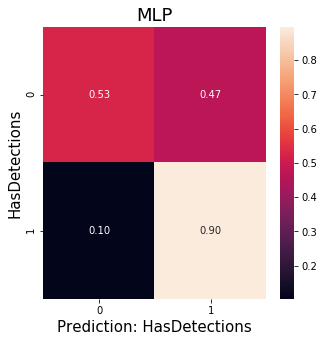

In [33]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test0, y_pred)
conf_mx


cm = confusion_matrix(y_test0, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))

hm = sn.heatmap(cmn, annot=True, fmt='.2f')#, x_label='label')
hm.axes.set_title("MLP",fontsize=18)
hm.set_xlabel('Prediction: HasDetections',fontsize=15)
hm.set_ylabel('HasDetections',fontsize=15)